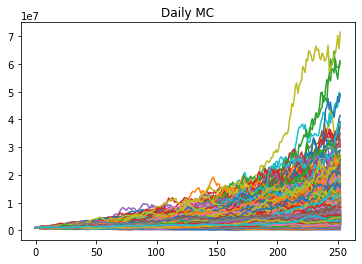

In [3]:
import numpy as np
import numpy.random as nrand
import matplotlib.pyplot as plt
import math

#Define vars
S = 1000000
T = 252
mu = 1.92246
vol = .86123  #Between .76 and .86

result = []
for i in range(1000):
    daily_returns = np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    result.append(price_list[-1]) #appending each runs end value --to calculate the mean return
        
    plt.plot(price_list)#This is key, KEEP THIS IN LOOP,votherwise it will plot one iteration/return path.
plt.title('Daily MC')
plt.show()

In [5]:
from scipy import stats
from statistics import stdev

print('Mean:',np.mean(result))
print('Mean Ret:',np.mean(result)/S*100)
print('Median:',np.median(result))
print('Median Ret:',np.median(result)/S*100)
print('Min:',np.min(result))
print('Min Ret:',np.min(result)/S*100)
print('Max:',np.max(result))
print('Max Ret:',np.max(result)/S*100)
#print('Mode:',stats.mode(result))
print('Stdev', stdev(result))
mc_mu = np.mean(result)
med = np.median(result)
mc_min = np.min(result)
mx = np.max(result)
std = stdev(result)

metrics = [mc_mu,med,mc_min,mx]
print('sharpe:',mu/vol)

print('5% Quantile',np.percentile(result,5))
print('5% Quantile %',np.percentile(result,5)/S*100)
print('95% Quantile',np.percentile(result,95))
print('95% Quantile %',np.percentile(result,95)/S*100)

Mean: 6724911.017932056
Mean Ret: 672.4911017932056
Median: 4768037.9579970855
Median Ret: 476.80379579970855
Min: 275965.7032899351
Min Ret: 27.596570328993508
Max: 71420684.89962855
Max Ret: 7142.068489962856
Stdev 6911545.893281775
sharpe: 2.2322260023454827
5% Quantile 1115557.8582103844
5% Quantile % 111.55578582103844
95% Quantile 18671766.045138605
95% Quantile % 1867.1766045138604


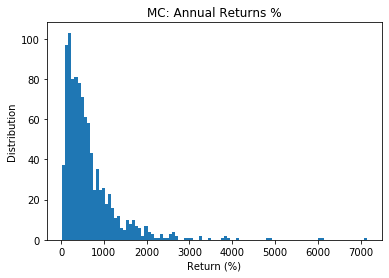

Mean return %: 672.4911017932056
Median return %: 476.8037957997085
Min return %: 27.596570328993508
Max return %: 7142.068489962856
Stdev % 691.1545893281775


In [6]:
'''Histogram (A much more usable plot!)'''

res = [i/S*100 for i in result]
plt.title('MC: Annual Returns %')
plt.xlabel('Return (%)')
plt.ylabel('Distribution')
plt.hist(res,bins=100)
plt.show()


print('Mean return %:',np.mean(res))
print('Median return %:',np.median(res))
print('Min return %:',np.min(res))
print('Max return %:',np.max(res))
#print('Mode:',stats.mode(result))
print('Stdev %', stdev(res))

In [16]:
import pandas as pd

'''Hint -- if youre having issues with path -- drag and drop file into terminal, copy abs path!'''
omni = pd.read_excel('/Users/zoakes/Quant/Py_Review/Omni/Omni_Paper-2.xlsx')


o = omni.iloc[1:23,0:16]

o.columns = ['date','roku','amd','bynd','cost','googl','gs','kmi','nflx','pypl','slb','teva','ual','lulu','intc','tsla']
#omni.iloc[0]

'''Fix the sheet! (sorry -- practicing bad data science of more than 1 value per cell : / )'''
o.iloc[19]
o['date'].iloc[19] = '8.28.19' #Fix the asterisk
o.iloc[19]

pct = o.set_index('date').cumsum(axis=0).pct_change().fillna(0)
pct.head()
pct.tail()

,roku,amd,bynd,cost,googl,gs,kmi,nflx,pypl,slb,teva,ual,lulu,intc,tsla
date,,,,,,,,,,,,,,,
8.26.19,1.340235,0.018428,0.076512,-0.039867,0.136253,0.131909,0.000000,0.070030,-0.010877,-0.012845,-0.773549,-0.060488,-0.006767,0.018691,0.100340
8.27.19,0.299686,0.055074,0.008198,0.221901,0.013387,-0.009230,0.078747,0.128913,0.020719,0.000000,-32.711905,0.104896,1.326965,0.084665,0.044005
8.28.19,0.014594,0.057830,0.005247,0.049961,0.018089,0.072340,0.181513,0.086042,-0.028372,0.701716,0.092278,0.149145,-0.202104,-0.013801,0.022376
8.29.19,0.158855,0.028997,0.176784,0.092509,0.034749,0.000000,0.030362,0.011178,0.093776,-0.047409,-0.033793,0.000000,0.050427,0.000000,0.052244
8.30.19,-0.047635,0.019681,0.051178,0.068184,0.058361,0.067694,-0.044479,0.041769,-0.003637,-0.058271,0.034875,0.060336,1.075589,0.046416,-0.000626


In [17]:
'''Monte carlo method -- efficient frontier'''

#Monte Carlo -- Portfolio Optimization
#np.random.seed(100)

##INCLUDE DATA HERE 

#Normalize returns--Nat Log -- Technically, it uses log returns, but the difference is immaterial.
#log_ret = np.log(ret/ret.shift(1)) #Calc for log returns, if official is important (This is instead of pct_change())
log_ret = pct
ret = log_ret
#Create Temporary (Random) weights
weights = np.array(np.random.random(15)) #USE NUM SECURITIESS 

#Rebalance w/ constraints (CANNOT BE > 1)
weights = weights/np.sum(weights)
print(weights)

#DEFINE ARRAYS FOR STORING METRICS 
num_runs = 1000    #Kick this number up 10k-100k for better results
all_weights = np.zeros((num_runs,len(ret.columns)))
ret_arr = np.zeros(num_runs)
vol_arr = np.zeros(num_runs)
sharpe_arr = np.zeros(num_runs)

#Begin MC Loop
for run in range(num_runs):
    
    #Weights
    weights = np.array(np.random.random(15))  #CHG to number securities *** THIS is the key to MC, this random value creation for weights
    #If you're looking for a challenge, try using a poisson, gamma or Student T dist!
    weights = weights/np.sum(weights)
    
    #Save weights (For reference Later)
    all_weights[run,:] = weights
    
    #Expected Ret (Record each runs return in ret_arr)
    exp_ret = np.sum((log_ret.mean() * weights) * 252)
    ret_arr[run] = np.sum( (log_ret.mean() * weights) * 252) #Time =  year
    
    #Exp Vol: (Lets attempt some linear algebra w/out runtime error!)
    exp_vol = np.sum((log_ret.std() * weights) * 252)
    # Sqrt of dot product of Transposed weights X Cov of Log returns & weights--whew.
    vol_arr[run] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    
    #Sharpe
    SR = exp_ret/exp_vol
    sharpe_arr[run] = ret_arr[run]/vol_arr[run]

[0.04727996 0.01539452 0.08030188 0.10054715 0.01319605 0.0841354
 0.08885786 0.11815803 0.13581912 0.02133359 0.05851192 0.01377357
 0.0532827  0.114999   0.05440927]


In [19]:
#sharpe_arr.argmax()
#MC_SR = sharpe_arr[7145] #Plug in to sharpe_arr10.094382

#find max SR per vol arr and SR array (for plotting)
max_sr_vol = vol_arr[sharpe_arr.argmax()]
max_sr_ret = ret_arr[sharpe_arr.argmax()] #85563 is max idx

#Save optimal weights, calc SR_annualized, 
idx = sharpe_arr.argmax()
#all_weights[idx]
MC_SR = sharpe_arr[idx]
print(MC_SR)
SR_ann = np.sqrt((MC_SR))*12
SR_ann

print('Max Sharpe:',MC_SR)
print('Max Annualized Sharpe',SR_ann)
print('max sr ret:',max_sr_ret)
#print('Max sr vol:',max_sr_vol)

7.093412354335337
Max Sharpe: 7.093412354335337
Max Annualized Sharpe 31.96015298812395
max sr ret: 39.555508162943184


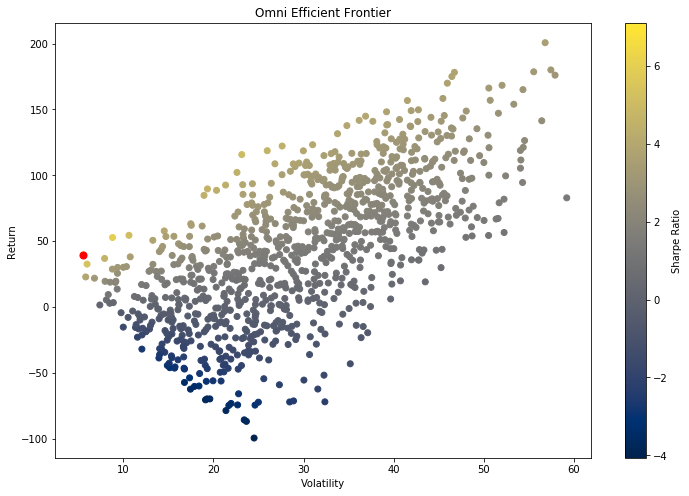

In [20]:
import matplotlib.pyplot as plt
'''Plot the Markowitz efficient frontier'''
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Omni Efficient Frontier')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In [ ]:
'''
-- Helper functions --
Once you have the optimal weights (list), you can pull them up in a DF with their tickers (rather than trying to match with order)
AND you can pkl the ^^ weights df for later reference!  
(nothing worse than running a 500k MC to forget to run them, or accidentally start it again)'''


def create_wts_df(min_func,sec_df):
    '''Creates df of optimization result weights w/ respective tickers'''
    data = {'Sec':sec_df.columns,'Wt':all_weights[idx]}
    res = pd.DataFrame(data).sort_values(by='Wt',ascending=False).set_index('Sec')
    return res

def create_pkl(df,filename):
    '''Pkls the weights, so you can save them for later!'''
    name = filename + '.pkl'
    df.to_pickle(name)
    return '{} file pickled'.format(name)

#res.to_pickle('TRIPLE_opt_flr.pkl') #Simple pkl

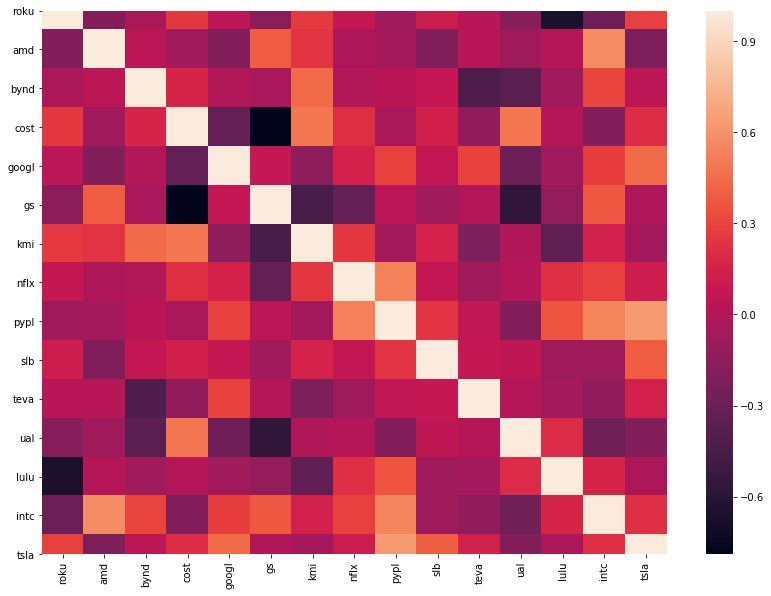

In [18]:
'''Little extra fun -- correlation!'''

corr = pct.corr()
import seaborn as sns
ax = sns.heatmap(corr)
ax.figure.set_size_inches(14,10)

In [ ]:
#-Happy Trading !

#-ZO